# Dimensionality Reduction with PCA and LDA

#### Garrett McCue


In [33]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
# import plotly.express as px

sns.set_style("white")
sns.set_context("notebook", font_scale=1.2) #set theme for visualizations
%matplotlib inline

![](https://miro.medium.com/max/1400/1*vXQ5sgMF0XmiY4Jc6gJVwA.png)
### Table of Contents

* [1. Data](#data)
    * [1.1 Load Data](#load-data)
    * [1.2 EDA](#eda)
* [2. PCA](#pca)
    * [2.1 PCA Logic](#pca-logic)
    * [2.2 Applying PCA](#applying-pca)
    * [2.3 PCA Results](#pca-results)
        * [2.3.1 1D Projection](#pca1)
        * [2.3.2 2D Projection](#pca2)
        * [2.3.3 3D Projection](#pca3)
    * [2.4 PCA Analysis](#pca-analysis)
* [3. LDA](#lda)
    * [3.1 LDA Logic](#lda-logic)
    * [3.2 Applying LDA](#applying-lda)
    * [3.3 LDA Results](#lda-results)
        * [3.3.1 1D Projection](#lda1)
        * [3.3.2 2D Projection](#lda2)
        * [3.3.3 3D Projection](#lda3)
    * [3.4 LDA Analysis](#lda-analysis)
* [4. Conclusion](#conclusion)
* [5. Full Code](#code)

#### Aims:
1. Apply PCA as a dimensionality reduction technique.
2. Apply Linear Discriminate Analysis (LDA) as a dimensionality reduction technique.




## 1. Data<a class="anchor" id="data"></a>

The dataset that will be used to implement the two dimensionality reduction techniques is the [Stellar Classification Dataset](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17) from Kaggle. 
The context of the data, as reported by the dataset, is quoted from Kaggle as
> In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

The dataset consits of `100,000` observations from the [Sloan Digital Sky Survey](https://www.sdss.org/). Each observation has `17 features` columns and belongs to one of `3 classes` which are either a `star`, `galaxy`, or `quasar`. The goal of the assignment is to use `PCA` and `LDA` to reduce the dimensionality of the dataset. 


### 1.1 Load Data<a class="anchor" id="load-data"></a>

In [34]:
DATA = "data/star_classification.csv"
df = pd.read_csv(DATA)
df.shape

(100000, 18)

### 1.2 EDA<a class="anchor" id="eda"></a>


In [60]:
# we are going to drop the obj_ID', 'run_ID','rerun_ID', 'field_ID', 'spec_obj_ID', 'MJD', 'fiber_ID', 'cam_col', 'plate' 
# from the dataset, becasue they are identifiers from the Sloan Digital Sky Survey and are not apart of the stellar 
# classification process. 

# columns = ['obj_ID', 'run_ID','rerun_ID', 'field_ID', 'spec_obj_ID', 'MJD', 'fiber_ID', 'cam_col', 'plate']
# df = df.drop(columns=columns)
df.head()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [36]:
# analyze data at a high level
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [37]:
# see if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

We see that all columns conatin numerical data(float64) besides the class column, which contains objects. The objects in this column correspond to one of the three classes that each observation belongs to. Lets see what classes the observations are grouped into.....

/Users/garrettmccue/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


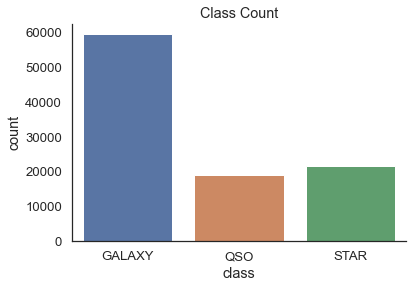

In [38]:
# plot the number of observations within each class
sns.countplot(df['class'], palette="deep")
sns.despine()
plt.title("Class Count")

plt.show()

The goal of the assignment is to apply dimensionality reduction techniques in order to project the classes into a lower dimension, which can lower the computational need and aid in classification of new samples. 


## 2. PCA<a class="anchor" id="pca"></a>

 Technical description of techniques



### 2.1 PCA Logic<a class="anchor" id="pca-logic"></a>

1. compute mean of each column and subtract it from titself in order to center the data 
    * `X_mean = X - np.mean(X)`
2. calculate covariance matrix from the centered data
    * `cov_matrix = np.cov(X_mean)`
3. compute eigenvectors and eigenvalues from covariance matrix
    * `eigen_vals, eigen_vecs = np.linalg.eigh(cov_matrix)`
4. sort the eigenvalues and eigenvectors in decreasing order by:
    *  `np.argsort()` to sort the indices in ascending order
    *  `np.flip()` to reverse the ascending index list into the desired descending list.
5. select the largest _n_ amount of eigenvalues and eigenvectors
    * _`n`_  being the desired number of principal components
6. transform the data into a lower dimensional space by taking the dot product of the selected subset of eigenvectors and the mean-centered data. 
    * `X_pca = np.dot(eigenvec_subset, X_mean)`

### 2.2 Applying PCA<a class="anchor" id="applying-pca"></a>


In [39]:
# seperate features and target first
X = df.drop(columns=['class'])
classes_df = pd.DataFrame(df['class'])
print("X shape: {}\nclasses shape: {}".format(X.shape, classes_df.shape))

X shape: (100000, 17)
classes shape: (100000, 1)


In [56]:
# create the PCA function

def PCA(data, n):
    '''
    Arguments:
        X -- df to be projected into a lower dimensional space.. shape (num examples, num features)
        n -- number of desired principal components or the number of dimensions to reduce the dataset to
            n < features 
    Returns:
        X_pca -- the new reduced data from of shape (num examples, n)
    '''
    X = data.copy()
    # step 1: normalize data
    X_mean = X - np.mean(X, axis=0)

    # step 2: calcualte covariance
    cov_mat = np.cov(X_mean, rowvar=False) # False b/c observations are row-wise & features are column-wise

    # step 3: compute eigenvals and eigenvectors from covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)

    # step 4: sort eigenvals index w/ argsort() and flip() to get the largest egienvals on top
    # apply the sorted indices to the eigenvectors in order to sort them in descending order
    eigenvecs_sorted = eigen_vecs[:, np.flip(np.argsort(eigen_vals))]

    # step 5: create the eigenvector subset by slicing from the first element to the specified nth element
    eigenvec_subset = eigenvecs_sorted[:,0:n]

    #step 6: project the dataset by using the dot product and eigenvector subset
    X_pca = np.dot(X_mean, eigenvec_subset)


    return X_pca


### 2.3 PCA Results<a class="anchor" id="pca-results"></a>

#### 2.3.1 1D Projection <a class="anchor" id="pca1"></a>

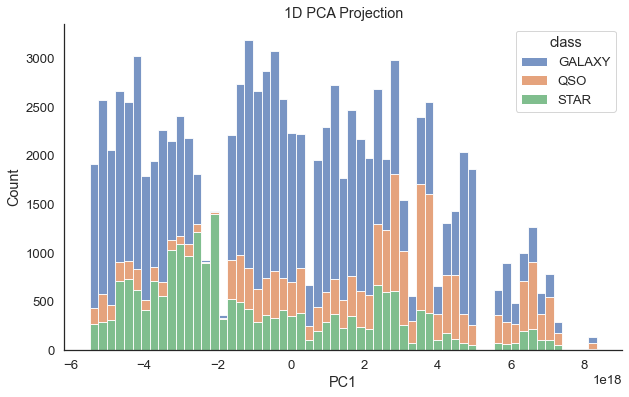

In [57]:
# create the one dimensional data and set the column to be the 1st principal component
pca_one_df = pd.DataFrame(PCA(X, 1), columns=['PC1'])
# join the classes back to the observations
pca_one_df = pd.concat([pca_one_df, classes_df], axis=1)

# plot the new df to view the class seperation
f, ax = plt.subplots(figsize=(10, 6))
sns.despine(f)
sns.histplot(pca_one_df, x = 'PC1', hue = "class", multiple='stack', palette='deep')
plt.title("1D PCA Projection")
plt.show()

#### 2.3.2 2D Projection <a class="anchor" id="pca2"></a>

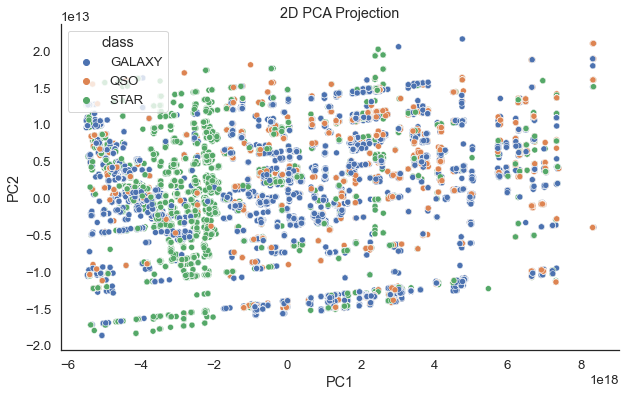

In [58]:
# 2D projection
# create the 2 dimensional data and set the columns to be the 1st and 2nd principal component
pca_two_df = pd.DataFrame(PCA(X, 2), columns=['PC1', 'PC2'])
# join the classes back to the observations
pca_two_df = pd.concat([pca_two_df, classes_df], axis=1)


# plot the new df to view the class seperation
f, ax = plt.subplots(figsize=(10, 6))
sns.despine(f)
sns.scatterplot(data = pca_two_df, x = 'PC1', y = 'PC2', hue = "class", palette='deep')
plt.title("2D PCA Projection")
plt.show()

#### 2.3.3 3D Projection <a class="anchor" id="pca3"></a>

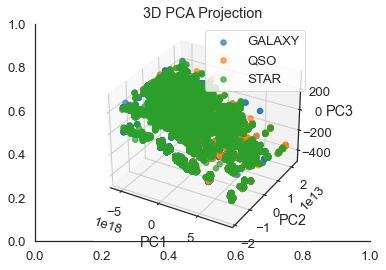

In [59]:
%matplotlib inline
# 3D projection
# create the 3 dimensional data and set the columns to be the 1st and 2nd principal component
pca_three_df = pd.DataFrame(PCA(X, 3), columns=['PC1', 'PC2', 'PC3'])
# join the classes back to the observations
pca_three_df = pd.concat([pca_three_df, classes_df], axis=1)

fig_3d, ax_3d = plt.subplots(1)
ax_3d = plt.axes(projection='3d')

groups = pca_three_df.groupby(df['class'])
for name, group in groups:
    ax_3d.scatter3D(group['PC1'], group['PC2'], group['PC3'], s=30, label=name, alpha=.7)
ax_3d.legend(loc=1)
ax_3d.set(title='3D PCA Projection', xlabel='PC1', ylabel='PC2', zlabel='PC3')
sns.despine()
plt.show()



### 2.4 PCA Analysis<a class="anchor" id="pca-analysis"></a>
An analysis of the results, i.e., did you obtain what you expected? Were there any surprises? What conclusions can you draw from the experiments? etc.

## 3. LDA<a class="anchor" id="lda"></a>
Technical description of techniques


### 3.1 LDA Logic<a class="anchor" id="lda-logic"></a>
1. Compute the within class scatter
    * `Sw = sum(np.dot((X_class - mean_class).T, (X_class - mean_class)))`
2. Compute the between class scatter `Sb`
    * `Sb = sum(class_num * np.dot((mean_class - X2_mean).T, (mean_class - X2_mean))`
3. Calculate eigenvalues and eigenvectors from (`inv_Sw` * `Sb`)
    * `Sw2 = np.dot(np.linalg.inv(Sw), Sb)`
    * `eigenvals, eigenvecs = np.linalg.eigh(Sw2)`
4. Sort the eigenvectors and eigenvalues in descending order
    * `np.argsort()`
    * `np.flip()`
5. Select the largest _n_ amount of eigenvalues and eigenvectors
6. transform the data into a lower dimensional space by taking the dot product of the selected subset of eigenvectors and the original data. 
    * `X_lda = np.dot(eigenvec_subset, X_mean)`

### 3.2 Applying LDA<a class="anchor" id="applying-lda"></a>


In [86]:
# seperate features and target first
# drop id fields
columns = ['class','obj_ID', 'run_ID','rerun_ID', 'field_ID', 'spec_obj_ID', 'MJD', 'fiber_ID', 'cam_col', 'plate']
data = df.drop(columns=columns)
labels = df['class']
print("X shape: {}\nlabels shape: {}".format(X.shape, labels.shape))


X shape: (100000, 17)
labels shape: (100000,)


In [87]:
def LDA(data, labels, n):
    '''
    Arguments:
        data -- df to be projected into a lower dimensional space.. shape (num examples, num features)
        labels -- the labels for each observation in data
        n -- number of desired principal components or the number of dimensions to reduce the dataset to
            n < features 
    Returns:
        X_lda -- the new reduced data from of shape (num examples, n)
    '''
    X = data.copy()
    # compute mean of data
    X_mean = X.mean()
    # initlize empty lists to hold the scatters for each class
    Sb = []
    Sw = []

    # loop through each class and compute the scatters
    for c in labels.unique():
        # compute between class scatter for each class
        c_mean = X.loc[labels==c].mean()
        c_diff = c_mean - X_mean
        c_Sb = c_diff.to_frame() @ c_diff.to_frame().T
        Sb.append(c_Sb)
        # compute within class scatter for each class
        c_vecs = X.loc[labels==c] # seperate data into classes
        c_Sw = c_vecs.cov() #class scatter
        Sw.append(c_Sw)
    # find the summation of both Sb and Sw to compute the between class and within class scatters
    b_scatter = sum(Sb)
    w_scatter = sum(Sw)
    
    #Calculate Sw2 and eigenvectors/eigenvalues
    Sw2 = np.linalg.inv(w_scatter)
    eigenvals, eigenvecs = np.linalg.eigh(Sw2 * b_scatter)
    # get the subset of eigenvecs
    transformation_matrix = eigenvecs[:n]
    column_names = ['LD' + str(num + 1) for num in range(n)]
    #transform original data by applying the eigenvector subset
    X_lda = pd.DataFrame((transformation_matrix.dot(X.T).T), columns=column_names)
    
    return X_lda

### 3.3 LDA Results<a class="anchor" id="lda-results"></a>

#### 3.3.1 1D Projection <a class="anchor" id="lda1"></a>

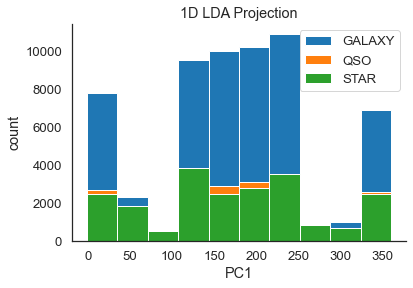

In [96]:
lda_one = LDA(data=data, labels=labels, n=1)
# plot the new df to view the class seperation

f, ax = plt.subplots(1)
groups = lda_one.groupby(df['class'])
for c, group in groups:
    ax.hist(group['LD1'], label=c)

    # sns.histplot(group['LD1'], x = 'LD1', hue = "class", multiple='stack', palette='deep')
ax.legend()
ax.set(title='1D LDA Projection', xlabel='PC1', ylabel='count')
sns.despine()
plt.show()

#### 3.3.2 2D Projection <a class="anchor" id="lda2"></a>

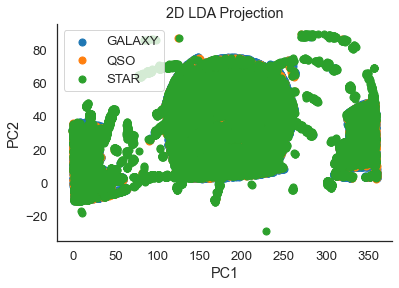

In [97]:
lda_two = LDA(data=data, labels=labels, n=2)
# plot the new df to view the class seperation
f, ax = plt.subplots(1)
groups = lda_two.groupby(df['class'])
for c, group in groups:
    ax.scatter(group['LD1'], group['LD2'], s=50, label=c)
ax.legend()
ax.set(title='2D LDA Projection', xlabel='PC1', ylabel='PC2')
sns.despine()
plt.show()

#### 3.3.3 3D Projection <a class="anchor" id="lda3"></a>

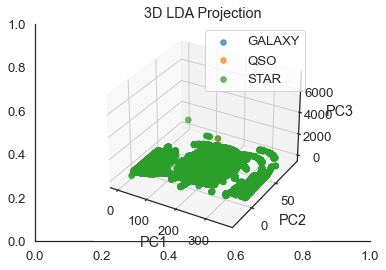

In [103]:
lda_three = LDA(data=data, labels=labels, n=3)
# plot the new df to view the class seperation
fig_3d, ax_3d = plt.subplots(1)
ax_3d = plt.axes(projection='3d')
groups = lda_three.groupby(df['class'])
for c, group in groups:
    ax_3d.scatter3D(group['LD1'], group['LD2'], group['LD3'], s=30, label=c, alpha=.7)
ax_3d.legend()
ax_3d.set(title='3D LDA Projection', xlabel='PC1', ylabel='PC2', zlabel='PC3')
sns.despine()
plt.show()

### 3.4 LDA Analysis<a class="anchor" id="lda-analysis"></a>

## 4. Conclusion<a class="anchor" id="conclusion"></a>

## 5. Full Code<a class="anchor" id="code"></a>

In [ ]:
def PCA(X, n):
    '''
    Arguments:
        X -- df to be projected into a lower dimensional space.. shape (num examples, num features)
        n -- number of desired principal components or the number of dimensions to reduce the dataset to
            n < features 
    Returns:
        X_pca -- the new reduced data from of shape (num examples, n)
    '''
    # step 1: normalize data
    X_mean = X - np.mean(X, axis=0)

    # step 2: calcualte covariance
    cov_mat = np.cov(X_mean, rowvar=False) # False b/c observations are row-wise & features are column-wise

    # step 3: compute eigenvals and eigenvectors from covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)

    # step 4: sort eigenvals index w/ argsort() and flip() to get the largest egienvals on top
    # apply the dorted indices to the eigenvectors in order to sort them in descending order
    eigenvecs_sorted = eigen_vecs[:, np.flip(np.argsort(eigen_vals))]

    # step 5: create the eigenvector subset by slicing from the first element to the specified nth element
    eigenvec_subset = eigenvecs_sorted[:,0:n]

    #step 6: project the dataset by using the dot product and eigenvector subset
    X_pca = np.dot(X_mean, eigenvec_subset)

    return X_pca
